# Laptop Price dataset

### Import Required Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the Dataset

In [22]:
df = pd.read_csv(r"C:\Users\bbuser\Downloads\laptopData.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Data Exploration

In [23]:
df.shape

(1303, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [25]:
df.dtypes

Unnamed: 0          float64
Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [26]:
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


### Rename Columns

In [27]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [28]:
df.rename(columns={"Cpu": "CPU","Ram": "RAM [GB]","Gpu": "GPU","Weight": "Weight [kg]"}, inplace=True)

In [29]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU', 'RAM [GB]', 'Memory', 'GPU', 'OpSys', 'Weight [kg]', 'Price'],
      dtype='object')

### Missing Values Analysis

In [30]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({"Missing Count": missing_data, "Missing Percentage": missing_percentage})
missing_info

,Missing Count,Missing Percentage
Unnamed: 0,30,2.302379
Company,30,2.302379
TypeName,30,2.302379
Inches,30,2.302379
ScreenResolution,30,2.302379
CPU,30,2.302379
RAM [GB],30,2.302379
Memory,30,2.302379
GPU,30,2.302379
OpSys,30,2.302379


In [31]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [32]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'CPU', 'RAM [GB]',
       'Memory', 'GPU', 'OpSys', 'Weight [kg]', 'Price'],
      dtype='object')

In [33]:
df.dropna(how = "all", inplace = True)

In [34]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
CPU                 0
RAM [GB]            0
Memory              0
GPU                 0
OpSys               0
Weight [kg]         0
Price               0
dtype: int64

### Duplicates Analysis

In [35]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicates
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows

Number of duplicate rows: 29


,Company,TypeName,Inches,ScreenResolution,CPU,RAM [GB],Memory,GPU,OpSys,Weight [kg],Price
1274,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1275,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1278,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1279,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1281,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1282,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.duplicated().sum()

0

### Clean and Convert Data Types
#### RAM Column

In [38]:
df["RAM [GB]"] = df["RAM [GB]"].str.replace("GB", "").astype(int)

#### Weight Column

In [39]:
df["Weight [kg]"].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

In [40]:
# Replace '?' with NaN
df["Weight [kg]"] = df["Weight [kg]"].replace("?", np.nan)

# Convert valid values to float
df["Weight [kg]"] = df["Weight [kg]"].str.replace("kg", "")

# Convert to float (will leave NaNs intact)
df["Weight [kg]"] = pd.to_numeric(df["Weight [kg]"], errors='coerce')

# Fill NaNs with median weight
df["Weight [kg]"] = df["Weight [kg]"].fillna(df["Weight [kg]"].median())

In [41]:
df["Weight [kg]"].unique()

array([1.370e+00, 1.340e+00, 1.860e+00, 1.830e+00, 2.100e+00, 2.040e+00,
       1.300e+00, 1.600e+00, 2.200e+00, 9.200e-01, 1.220e+00, 2.500e+00,
       1.620e+00, 1.910e+00, 2.300e+00, 1.350e+00, 1.880e+00, 1.890e+00,
       1.650e+00, 2.710e+00, 1.200e+00, 1.440e+00, 2.800e+00, 2.000e+00,
       2.650e+00, 2.770e+00, 3.200e+00, 1.490e+00, 2.400e+00, 2.130e+00,
       2.430e+00, 1.700e+00, 1.400e+00, 1.800e+00, 1.900e+00, 3.000e+00,
       1.252e+00, 2.700e+00, 2.020e+00, 1.630e+00, 1.960e+00, 1.210e+00,
       2.450e+00, 1.250e+00, 1.500e+00, 2.620e+00, 1.380e+00, 1.580e+00,
       1.850e+00, 1.230e+00, 2.160e+00, 2.360e+00, 7.200e+00, 2.050e+00,
       1.320e+00, 1.750e+00, 9.700e-01, 2.560e+00, 1.480e+00, 1.740e+00,
       1.100e+00, 1.560e+00, 2.030e+00, 1.050e+00, 5.400e+00, 4.400e+00,
       1.290e+00, 1.950e+00, 2.060e+00, 1.120e+00, 3.490e+00, 3.350e+00,
       2.230e+00, 2.900e+00, 4.420e+00, 2.690e+00, 2.370e+00, 4.700e+00,
       3.600e+00, 2.080e+00, 4.300e+00, 1.680e+00, 

#### Price Column

In [42]:
df["Price"] = df["Price"].astype(float)

#### Inches Column

In [43]:
# Step 1: Replace '?' with NaN
df["Inches"] = df["Inches"].replace("?", np.nan)

# Step 2: Drop rows with missing values in 'Inches'
df = df.dropna(subset=["Inches"])

# Step 3: Convert to float
df["Inches"] = df["Inches"].astype(float)

In [44]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
CPU                  object
RAM [GB]              int32
Memory               object
GPU                  object
OpSys                object
Weight [kg]         float64
Price               float64
dtype: object

### Feature Engineering
#### Extract Touchscreen

In [45]:
df['Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen', case=False, na=False).astype(int)
df.head()

,Company,TypeName,Inches,ScreenResolution,CPU,RAM [GB],Memory,GPU,OpSys,Weight [kg],Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


### Extract Resolution Width and Height

In [53]:
import re
# Extract resolution using regex
resolution = df['ScreenResolution'].str.extract(r'(\d+)\s*x\s*(\d+)')

# Assign to new columns and convert to integer
df['Width'] = resolution[0].astype('int')
df['Height'] = resolution[1].astype('int')
df.head()

,Company,TypeName,Inches,ScreenResolution,CPU,RAM [GB],Memory,GPU,OpSys,Weight [kg],Price,Touchscreen,Width,Height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600


### Extract CPU Brand

In [54]:
df['CPU_Brand'] = df['CPU'].apply(lambda x: x.split()[0])

### Extract CPU Series

In [55]:
df['CPU_Series'] = df['CPU'].apply(lambda x: ' '.join(x.split()[0:3]))

### Extract CPU Speed (GHz)

In [56]:
df['CPU_Speed_GHz'] = df['CPU'].str.extract(r'([\d\.]+)GHz')[0].astype(float)

In [57]:
df.head()

,Company,TypeName,Inches,ScreenResolution,CPU,RAM [GB],Memory,GPU,OpSys,Weight [kg],Price,Touchscreen,Width,Height,CPU_Brand,CPU_Series,CPU_Speed_GHz
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,Intel,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,Intel,Intel Core i5,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,Intel,Intel Core i5,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,Intel,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,Intel,Intel Core i5,3.1


### Data Visualization
#### Price Distribution

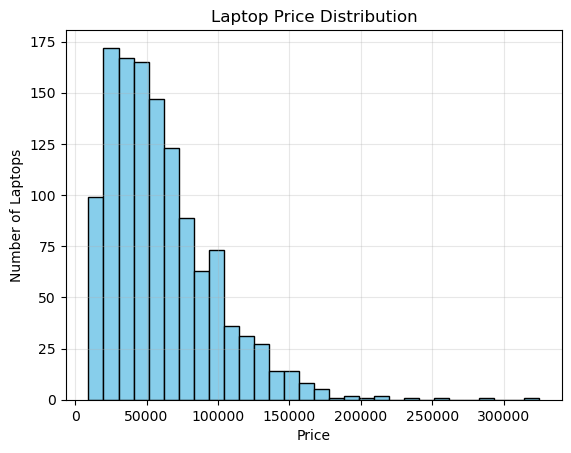

In [53]:
plt.hist(df["Price"], bins = 30, color = "skyblue", edgecolor = "black")
plt.title("Laptop Price Distribution")
plt.xlabel("Price")    
plt.ylabel("Number of Laptops")
plt.grid(True, alpha = 0.3)
plt.show()

#### RAM vs. Price

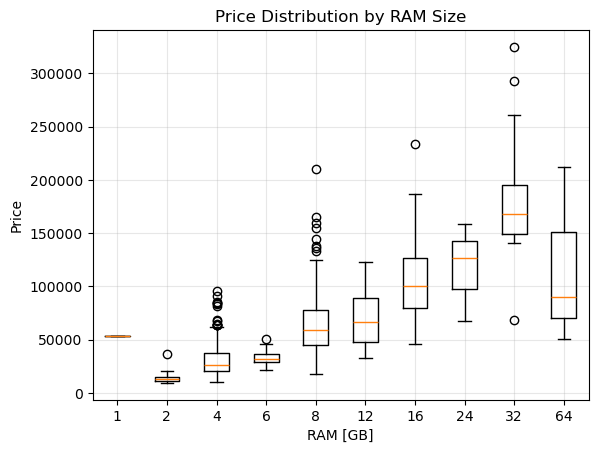

In [45]:
# Get unique RAM values in sorted order
ram_values = sorted(df["RAM [GB]"].unique())

# Group price data by RAM
box_data = [df[df["RAM [GB]"] == ram]["Price"] for ram in ram_values]

plt.boxplot(box_data, tick_labels = ram_values)
plt.title("Price Distribution by RAM Size")
plt.xlabel("RAM [GB]")
plt.ylabel("Price")
plt.grid(True, alpha = 0.3)
plt.show()

#### Average Price by Company

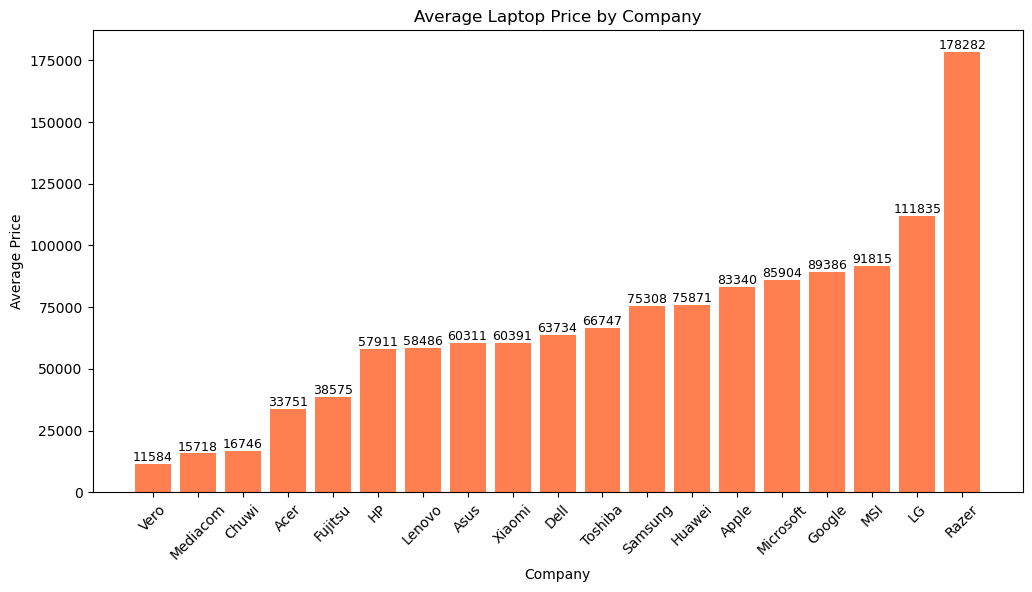

In [52]:
avg_price_by_company = df.groupby("Company")["Price"].mean().sort_values()

plt.figure(figsize=(12, 6))
bars = plt.bar(avg_price_by_company.index, avg_price_by_company.values, color="coral")

# Add labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.0f}',  # rounded to integer
        ha = "center",
        va= "bottom",
        fontsize = 9)
    
plt.title("Average Laptop Price by Company")
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()